Traveling salesman problem applied to network solved using Dijkstra algorithm

The Dijkstra's algorithm for shortest path, was conceived by computed scientist Edsger W. Dijkstra in 1956.
The core idea behind it is optimazing the path to every vertice, and then setting a target.

$S \leftarrow \{r\}, T \leftarrow \emptyset$

$p_r \leftarrow 0, y_r \leftarrow 0$

$p_i \leftarrow N_{IL}, y_i \leftarrow \infty \textrm{ for all other } i$

$\textbf{while }S \neq \emptyset\textbf{ do}$

$|\quad \quad \textrm{select a }i \in S \textrm{ minimizing } y_i$

$|\quad \quad \textbf{for }\{ j\in V:j \notin T \wedge (i,j) \in E\}\textbf{ do}$
<!--  -->
$|\quad \quad |\quad \quad \textbf{if } y_j>y_i+w_{ij}\textbf{ then}$

$|\quad \quad |\quad \quad |\quad \quad y_j  \leftarrow y_i + w_{ij}, p_j \leftarrow i$

$|\quad \quad \lfloor \quad \quad \lfloor\quad \quad S \leftarrow S \cup \{j\}$

$\lfloor \quad \quad S \leftarrow S\setminus \{i\},T\leftarrow T \cup \{i\}$

$y_r$ is the position of the source vertex, $r$, the vertex in which we begin our search
and we say that its "cost" (in this case distance) to every other vertex, $y_i$, is $\infty$ because we 
haven't started looking yet so we don't know how far they are.

Now we look at the mininum $y_i$, so the first iteration is $r$ as $y_r=0$.

Looking at every vertice that has an edge to $i$, and checking if the distance to this vertice can be shorter than the one used initially, and updating $y_j$ everytime it finds a new shorter distance.

The group $T$ contains the studied vertices, and $S$ contains the still to study vertices.

For more insight on the matter check [1]. 

This path finding algorithm can be used in the transportation system, optimazing mechanical enginnering parts, construction, maze path finding, GPS and others.

# Exemplo com Gráfico gerado dinâmicamente:

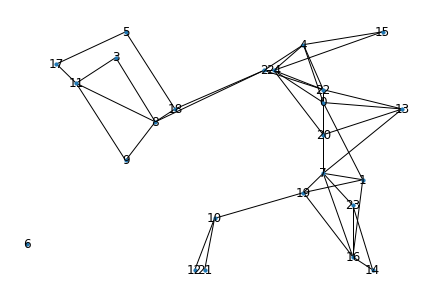

In [25]:
import networkx as nx 
from random import randrange, random

node_number = 25 # number of nodes

L = 200 #box side length
dL = 5 #node generation step
max_distance = 70 # maximum distance for vertice creation
min_distance = 1 # minimum distance for vertice creation
edginess = 60 # average percentage of node connecting 

# -- RANDOMIZED Graph initialization --#
x = []
y = []
pos={}

def node_d(G,n1,n2):
    r1 = G.nodes[n1]['pos']
    r2 = G.nodes[n2]['pos']
    return ((r1[0]-r2[0])**2 + (r1[1] - r2[1])**2)**(1/2)

G = nx.Graph()
for i in range(0,node_number):
    rx = randrange(0,L,dL)
    ry = randrange(0,L,dL)
    while rx in x and ry in y:
        rx = randrange(0,L,dL)
        ry = randrange(0,L,dL)
    x.append(rx)
    y.append(ry)
    G.add_node(i,pos=(rx,ry))
    for n in G.nodes():
        d = node_d(G,n,i)
        if(d < max_distance and d > min_distance):
            r = random()
            if(r < edginess/100):
                G.add_edge(i,n)

#-- Graph plot --#
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, node_size=10,width=1,with_labels = True)


In [26]:
#-- Auxiliary functions --#
def extract_min(Q):
    min=Q[0][0]
    i_min = 0
    for i in range(len(Q)):
        if(Q[i][1] < Q[i_min][1]):
            min=Q[i][0]
            i_min = i
    Q.pop(i_min)
    return min

def distance(G,src,node):
    src_pos = G.nodes[src]['pos']
    node_pos = G.nodes[node]['pos']
    return ((src_pos[0]-node_pos[0])**2 + (src_pos[1]-node_pos[1])**2)**(1/2)

def send_bottom(node,Q,alt):
    Q.insert(0,(node,alt))
    return
#-------------------------#

#-- if no target specified.: Finds shortest distance to all nodes
#-- if target provided: Finds shortest node path and distance target
def Dijkstra(G, source, target=None):

    dist[source] = 0 #distance from source to source = 0 (trivial)    
    for node in G.nodes():
        if node is not source:
            dist[node] = float('inf') #Maximum distance (will be overwritten if path found)
            prev[node] = -1 #Signals no path found

        Q.append((node, dist[node])) #Add every node and its distance to Q

    while len(Q) != 0: #While there are still nodes to search
        min_node = extract_min(Q) #Grab shortest distance node first
        
        for neighbor in G.neighbors(min_node): #Find neighbors of shortest node
            if(neighbor not in [n[0] for n in Q]): #if neighbor node is not in Q (has already been searched), skip further search
                continue
            alt = dist[min_node] + distance(G,min_node, neighbor) #distance from this neighbor to source is equal to node distance to sorce plus neighbor distance to node
            if alt < dist[neighbor] and dist[min_node] != float('inf'): #if new distance is smaller than prevously calculated, save this node for further search
                dist[neighbor] = alt
                prev[neighbor] = min_node
                send_bottom(neighbor,Q, alt)

        #CASE - TARGET SPECIFIED:
        if(target is min_node): #If node is target specified:
            #gather path from prev variable
            path = [target]
            path_node = prev[target]
            if(path_node == -1): #there is no prev
                print("Target node not connected")
                return None
            while path_node is not source:
                path.insert(0,path_node)
                path_node = prev[path_node]
            path.insert(0,source)
            return [dist[target], path] #return distance and path to target
    
    #Delete nodes note searched from output
    keys = list(dist.keys())
    for i in keys:
        if dist[i] == float('inf'):
            dist.pop(i)
    return sorted(dist.items(), key=lambda x: x[1]) #sort by distance

Find distance from source node to all connected nodes

   node    -  distance 
    10     -    0.00   
    21     -   40.31   
    12     -   41.23   
    19     -   49.24   
    7      -   67.27   
    1      -   80.87   
    23     -   96.43   
    20     -   97.27   
    16     -   105.15  
    14     -   119.29  
    13     -   131.30  
    22     -   132.27  
    0      -   144.11  
    24     -   153.17  
    2      -   158.17  
    4      -   168.67  
    15     -   209.90  
    18     -   212.26  
    8      -   226.18  
    9      -   259.72  
    11     -   276.18  
    5      -   277.26  
    3      -   280.03  
    17     -   294.21  


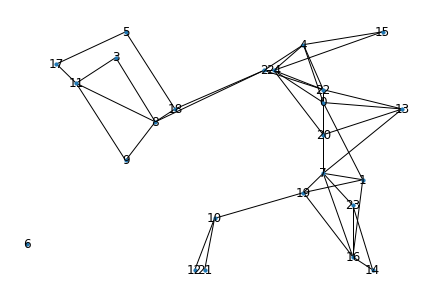

In [28]:
source = 10


dist = {} # will hold every node distance from the source node
prev = {} # will hold the path took to reach a specific target node
Q = [] #temporary list holding nodes searched

out = Dijkstra(G,source)
nx.draw(G,pos, node_size=10,width=1,with_labels = True)

print("{:^10s} - {:^10s}".format("node","distance"))
for node in out:
    print("{:^10d} - {:^10.2f}".format(node[0],round(node[1],2)))

find distance and path from source node to target node

distance: 276.18109736747243
path:[10, 19, 7, 20, 24, 2, 8, 11]


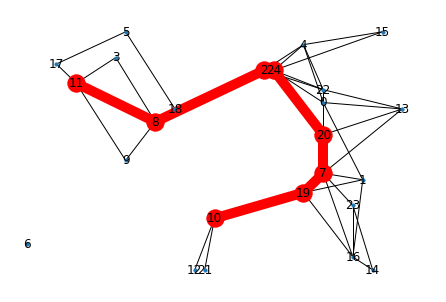

In [29]:
#-------------------#

source = 10
target = 11

#--------------------#

dist = {} # will hold every node distance from the source node
prev = {} # will hold the path took to reach a specific target node
Q = [] #temporary list holding nodes searched

out= Dijkstra(G,source,target)
if(out is not None):

    nx.draw(G,pos, node_size=10,width=1,with_labels = True)
    
    H = nx.Graph()
    for i in range(0,len(out[1])-1):
        H.add_node(out[1][i],pos=G.nodes[out[1][i]]['pos'])
        H.add_edge(out[1][i],out[1][i+1])
    
    nx.draw(H,pos,node_color='red',edge_color='red',width=10)
    print("distance: " + str(out[0]))
    print("path:" + str(out[1]))


# Exemplo com Gráfico de universidade de Aveiro e redondezas

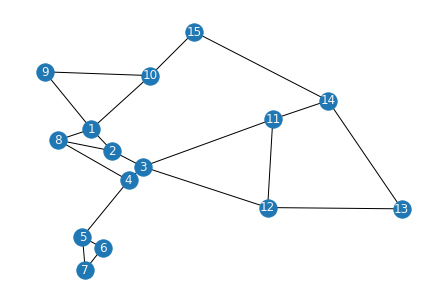

In [63]:
import networkx as nx 
from random import randrange, random

# -- Gráfico de Aveiro --#
G = nx.Graph()
G.add_node(1,pos=(-865.7674, 4063.1363)) #Reitoria
G.add_node(2,pos=(-865.6872, 4063.0150)) #Dfis
G.add_node(3,pos=(-865.5703, 4062.9277)) #Centro Pedagógico
G.add_node(4,pos=(-865.6241, 4062.8510)) #Ponte (lado Santiago)
G.add_node(5,pos=(-865.8017, 4062.5381)) #Ponte (lado Crasto)
G.add_node(6,pos=(-865.7245, 4062.4774)) #Cantina Crasto
G.add_node(7,pos=(-865.7909, 4062.3556)) #Bar estudante
G.add_node(8,pos=(-865.8956, 4063.0750)) #Cantina Santiago
G.add_node(9,pos=(-865.9470, 4063.4537)) #IT
G.add_node(10,pos=(-865.5403, 4063.4328)) #Hospital
G.add_node(11,pos=(-865.0693, 4063.1907)) #McDonalds
G.add_node(12,pos=(-865.0892, 4062.7008)) #Mercado Santiago
G.add_node(13,pos=(-864.5733, 4062.6938)) #Glicínias
G.add_node(14,pos=(-864.8569, 4063.2942)) #Doce Aveiro
G.add_node(15,pos=(-865.3715, 4063.6757)) #Parque Macaca
G.add_edge(1,2) #Reitoria - Dfis
G.add_edge(2,3) #Dfis - CP
G.add_edge(3,4) #CP - Ponte Santiago
G.add_edge(4,5) #Ponte 
G.add_edge(5,6) #Ponte Crasto - Cantina Crasto
G.add_edge(6,7) #Cantina - Bar estudante
G.add_edge(5,7) #Ponte - Bar estudante
G.add_edge(8,1) #Cantina Santiago - Reitoria
G.add_edge(8,2) #Cantina Santiago - Dfis
G.add_edge(8,4) #Cantina Santiago - Ponte Santiago
G.add_edge(9,1) #IT - Reitoria
G.add_edge(10,9) #IT - Hospital
G.add_edge(10,1) #Reitoria - Hospital
G.add_edge(11,3) #McDonalds - Centro Pedagógico
G.add_edge(12,11) #Mercado - McDonalds
G.add_edge(12,3) #Mercado - Centro Pedagógico
G.add_edge(13,12) #Glicínias - Mercado
G.add_edge(14,11) #Doce Aveiro - McDonalds
G.add_edge(14,13) #Doce Aveiro - Glicínias
G.add_edge(15,14) #Parque Macaca - Doce Aveiro
G.add_edge(15,10) #Doce Aveiro - Hospital



#-- Graph plot --#
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, with_labels = True,font_color = "whitesmoke",font_size=12)


# Caminho mais rápido de BE para Hospital

### Distância a todos os pontos:

[-86.57674, 406.31363]
[-86.56872, 406.3015]
[-86.55703, 406.29277]
[-86.56241, 406.2851]
[-86.58017, 406.25381000000004]
[-86.57245, 406.24774]
[-86.57909, 406.23555999999996]
[-86.58955999999999, 406.3075]
[-86.5947, 406.34537]
[-86.55403, 406.34328]
[-86.50693, 406.31907]
[-86.50892, 406.27008]
[-86.45733, 406.26938]
[-86.48569, 406.32941999999997]
[-86.53715, 406.36757]
   node    -  distance 
    1      -    0.00   
    8      -    0.14   
    2      -    0.15   
    3      -    0.29   
    9      -    0.36   
    10     -    0.37   
    4      -    0.39   
    15     -    0.67   
    5      -    0.74   
    12     -    0.82   
    6      -    0.84   
    11     -    0.86   
    7      -    0.93   
    14     -    1.09   
    13     -    1.34   


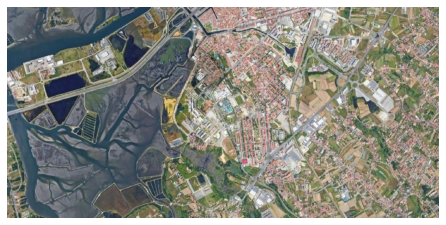

In [69]:
source = 1

dist = {} # will hold every node distance from the source node
prev = {} # will hold the path took to reach a specific target node
Q = [] #temporary list holding nodes searched

out= Dijkstra(G,source)
for p in pos:
    pos[p] = [pos[p][0]/10,pos[p][1]/10]
nx.draw(G,pos, node_size=50,width=1,with_labels = True,font_color = "black",font_size=9,node_color='whiteSmoke')

pos=nx.get_node_attributes(G,'pos')

print("{:^10s} - {:^10s}".format("node","distance"))
for node in out:
    print("{:^10d} - {:^10.2f}".format(node[0],round(node[1],2)))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Google Maps_page-0001.jpg')
imgplot = plt.imshow(img)


distance: 1.2164771708327509
path:[6, 5, 4, 3, 2, 1, 10]


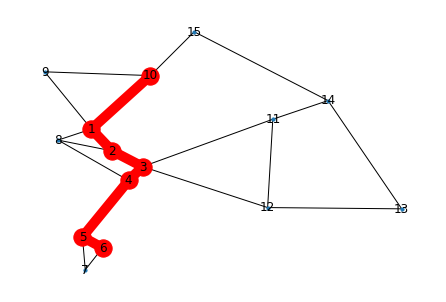

In [ ]:

source = 6 #BE
target = 10 #Hospital

dist = {} # will hold every node distance from the source node
prev = {} # will hold the path took to reach a specific target node
Q = [] #temporary list holding nodes searched


out= Dijkstra(G,source,target)

if(out is not None):
    
    nx.draw(G,pos, node_size=10,width=1,with_labels = True)
    
    H = nx.Graph()
    for i in range(0,len(out[1])-1):
        H.add_node(out[1][i],pos=G.nodes[out[1][i]]['pos'])
        H.add_edge(out[1][i],out[1][i+1])
    
    nx.draw(H,pos,node_color='red',edge_color='red',width=10)
    print("distance: " + str(out[0]))
    print("path:" + str(out[1]))


## References
[1]-Javaid, Adeel. (2013). Understanding Dijkstra Algorithm. SSRN Electronic Journal. 10.2139/ssrn.2340905